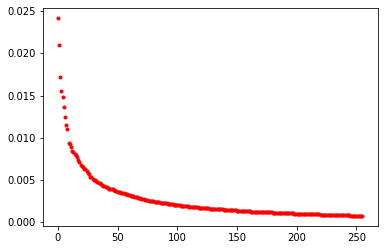

In [10]:
import sys
sys.path.append("..")
import os

import lauetools.LaueTools.IOimagefile as IOimage

import matplotlib.pyplot as plt
import numpy as np
from scipy import fft

def reduce(im, sx, sy, lp, hp):
    SX, SY = im.shape
    im_ = im.reshape(sx, SX // sx, sy,SY // sy).mean(-1).mean(1)
    #ss=cv2.dct(im_)
    ss=fft.dctn(im_)
    ss[:lp, :] = 0.
    ss[:, :lp] = 0.
    ss[hp:, :] = 0.
    ss[:, hp:] = 0.
    #return cv2.idct(ss), ss[lp: hp, lp: hp].ravel()
    return fft.idctn(ss), ss[lp: hp, lp: hp].ravel()

features=np.load('features4096.npy')

features=features.reshape((64*146,4096))

from sklearn.decomposition import PCA

n_pca=256
pca = PCA(n_components=n_pca, svd_solver='randomized')

pca_features=pca.fit_transform(features)#components_

plt.plot(np.arange(n_pca), pca.explained_variance_ratio_,'r.')


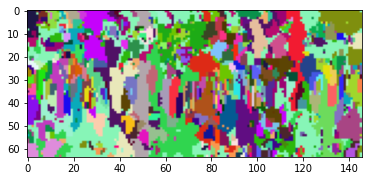

In [12]:
from sklearn.cluster import KMeans

n_clusters_=200

labels = KMeans(n_clusters=n_clusters_, init='k-means++').fit_predict(features)

grains=np.array(labels).reshape((64,146))

colors=np.random.uniform(size=(n_clusters_,3))

im=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(64):
    for j in range(146):
        im[i,j]=colors[grains[i,j]]

plt.imshow(im)

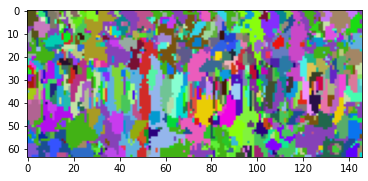

In [21]:
n_clusters_=250

labels = KMeans(n_clusters=n_clusters_, init='k-means++').fit_predict(features)

grains=np.array(labels).reshape((64,146))

colors=np.random.uniform(size=(n_clusters_,3))

im=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(64):
    for j in range(146):
        im[i,j]=colors[grains[i,j]]

plt.imshow(im)